# Tutorial 3: Text Analysis with NLTK

The [Natural Language Toolkit](http://www.nltk.org/) (NLTK) and is a fully featured library for doing everything from basic text analysis to sophisticated computational linguistics. Such analyses can have great journalistic importance when analyzing document corpora. 

The goal of this tutorial is to give you a flavor for what you can do with NLTK. We're really just scratching the surface here. 
- Parsing
- Tokenization
- Stopword removal
- Frequency counting
- Stemming
- Basic sentiment analysis

For more detail and to go deeper in learning about Natural Language Processing a good resources is: [Natural Langauge Processing with Python](http://www.nltk.org/book/). There are also APIs out there that allow you to do quite sophisticated text analysis, for example [AlchemyAPI](http://www.alchemyapi.com/). 

In [1]:
# We're going to use the Natural Language Toolkit here (NLTK) - http://www.nltk.org/
import nltk

Let's first look at some basic text operations using the 2016 State of the Union (SOTU) address. Here's the [sotu_2016.txt](https://www.dropbox.com/s/nume1fwb2g3frpf/sotu_2016.txt?dl=0) file which you should download to your local machine.

In [1]:
# Load in transcript file (may need to edit the file path to wherever you downloaded it)
file = open('Data/sotu_2016.txt', 'r')
transcript = unicode(file.read().decode("utf8"))

# Print it out
print transcript

Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:

Tonight marks the eighth year that I’ve come here to report on the State of the Union. And for this final one, I’m going to try to make it a little shorter. (Applause.) I know some of you are antsy to get back to Iowa. (Laughter.) I've been there. I'll be shaking hands afterwards if you want some tips. (Laughter.)

And I understand that because it’s an election season, expectations for what we will achieve this year are low. But, Mr. Speaker, I appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. So I hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (Applause.) So, who knows, we might surprise the cynics again.

But tonight, I want to go easy on the traditional li

Converting to lowercase text is very easy with the `.lower()` function. Sometimes is makes sense to convert everything because then capitals at the beginning of sentences or in names aren't treated differently. Other functions in the same vein include `.upper()` (converts to upper case) and `.title()` (converts to title case).

In [3]:
transcript_lower = transcript.lower()
print transcript_lower

mr. speaker, mr. vice president, members of congress, my fellow americans:

tonight marks the eighth year that i’ve come here to report on the state of the union. and for this final one, i’m going to try to make it a little shorter. (applause.) i know some of you are antsy to get back to iowa. (laughter.) i've been there. i'll be shaking hands afterwards if you want some tips. (laughter.)

and i understand that because it’s an election season, expectations for what we will achieve this year are low. but, mr. speaker, i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. so i hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (applause.) so, who knows, we might surprise the cynics again.

but tonight, i want to go easy on the traditional li

If you look *really* closely at the output you can see some inconsistencies. For instance sometimes it looks like the apostrophe's are angled and other times they're not. We want to normalize the text so that it's always using the same version of the apostrophe, as well as quotes and a few other special characters.

In [4]:
table = {
    ord(u'\u2018') : u"'",
    ord(u'\u2019') : u"'",
    ord(u'\u201C') : u'"',
    ord(u'\u201d') : u'"',
    ord(u'\u2026') : u'', 
    ord(u'\u2014') : u'', # get rid of em dashes
}
transcript_lower = transcript_lower.translate(table)
print transcript_lower

mr. speaker, mr. vice president, members of congress, my fellow americans:

tonight marks the eighth year that i've come here to report on the state of the union. and for this final one, i'm going to try to make it a little shorter. (applause.) i know some of you are antsy to get back to iowa. (laughter.) i've been there. i'll be shaking hands afterwards if you want some tips. (laughter.)

and i understand that because it's an election season, expectations for what we will achieve this year are low. but, mr. speaker, i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. so i hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (applause.) so, who knows, we might surprise the cynics again.

but tonight, i want to go easy on the traditional li

Now we want to strip out all of the punctuation so that we're left with just the words. 

In [5]:
import string

def remove_punctuation(text):
    # Grab the list of standard punctuation symbols that are provided in the string library
    punctuations = string.punctuation # includes following characters: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~

    # But don't strip out apostrophes, as we want to preserve possessives and contractions, an alternative would be to expand contractions
    excluded_punctuations = ["'"]
    for p in punctuations:
        if p not in excluded_punctuations:
            # replace each punctuation symbol by a space
            text = text.replace(p, " ") 

    return text

transcript_lower = remove_punctuation(transcript_lower)
print transcript_lower

mr  speaker  mr  vice president  members of congress  my fellow americans 

tonight marks the eighth year that i've come here to report on the state of the union  and for this final one  i'm going to try to make it a little shorter   applause   i know some of you are antsy to get back to iowa   laughter   i've been there  i'll be shaking hands afterwards if you want some tips   laughter  

and i understand that because it's an election season  expectations for what we will achieve this year are low  but  mr  speaker  i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families  so i hope we can work together this year on some bipartisan priorities like criminal justice reform     applause     and helping people who are battling prescription drug abuse and heroin abuse   applause   so  who knows  we might surprise the cynics again 

but tonight  i want to go easy on the traditional li

In some cases multiple punctuations in a row were removed, resulting in larger gaps of 2 or more spaces. We want to condense these down to only a single space which will result in a solid block of text with each word separated by only one space.

In [6]:
" ".join(transcript_lower.split())

u"mr speaker mr vice president members of congress my fellow americans tonight marks the eighth year that i've come here to report on the state of the union and for this final one i'm going to try to make it a little shorter applause i know some of you are antsy to get back to iowa laughter i've been there i'll be shaking hands afterwards if you want some tips laughter and i understand that because it's an election season expectations for what we will achieve this year are low but mr speaker i appreciate the constructive approach that you and the other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families so i hope we can work together this year on some bipartisan priorities like criminal justice reform applause and helping people who are battling prescription drug abuse and heroin abuse applause so who knows we might surprise the cynics again but tonight i want to go easy on the traditional list of proposals for the year ahead don't wor

### Tokenization
Tokenization is the process by which we split up a text into individual tokens. In this case we're interested in words as tokens. In other cases we might be interested in tokenizing at the level of paragraphs or sentences.

In [7]:
from nltk.tokenize import WhitespaceTokenizer

# Create a tokenizer from NLTK which will create tokens based on the whitespace in between words
tokenizer = WhitespaceTokenizer()

# Use the tokenizer on the text string for the transcript
transcript_tokens = tokenizer.tokenize(transcript_lower)

# And the output is a python list of tokens (in unicode)
print transcript_tokens

[u'mr', u'speaker', u'mr', u'vice', u'president', u'members', u'of', u'congress', u'my', u'fellow', u'americans', u'tonight', u'marks', u'the', u'eighth', u'year', u'that', u"i've", u'come', u'here', u'to', u'report', u'on', u'the', u'state', u'of', u'the', u'union', u'and', u'for', u'this', u'final', u'one', u"i'm", u'going', u'to', u'try', u'to', u'make', u'it', u'a', u'little', u'shorter', u'applause', u'i', u'know', u'some', u'of', u'you', u'are', u'antsy', u'to', u'get', u'back', u'to', u'iowa', u'laughter', u"i've", u'been', u'there', u"i'll", u'be', u'shaking', u'hands', u'afterwards', u'if', u'you', u'want', u'some', u'tips', u'laughter', u'and', u'i', u'understand', u'that', u'because', u"it's", u'an', u'election', u'season', u'expectations', u'for', u'what', u'we', u'will', u'achieve', u'this', u'year', u'are', u'low', u'but', u'mr', u'speaker', u'i', u'appreciate', u'the', u'constructive', u'approach', u'that', u'you', u'and', u'the', u'other', u'leaders', u'took', u'at', u'

We might wonder how long (i.e. how many tokens) were in the speech. 

In [8]:
len(transcript_tokens)

6160

Once we have a list of tokens we can have NLTK parse it into a Text object which lets us do some exploratory operations on it, like search it and see concordances (i.e. context around the search term). 

In [9]:
text_transcript = nltk.text.Text(transcript_tokens)
text_transcript.concordance("americans")

Building index...
Displaying 15 of 15 matches:
                                   americans tonight marks the eighth year that
 true and the reason that a lot of americans feel anxious is that the economy h
here are actually some areas where americans broadly agree we agree that real o
 job loss has gotten a lot tougher americans understand that at some point in t
d strengthen them applause and for americans short of retirement basic benefits
o get more students and low income americans online applause we've launched nex
rizona to new york solar is saving americans tens of millions of dollars a year
heir energy bills and employs more americans than coal in jobs that pay better 
ities and put tens of thousands of americans to work building a 21st century tr
 a prison cell when you come after americans we go after you applause and it ma
 or some special interest too many americans feel that way right now it's one o
s i hold this office but my fellow americans this cannot be my task or an

Basic visualization options, like a dispersion plot can help understand how different terms are distributed throughout the text.

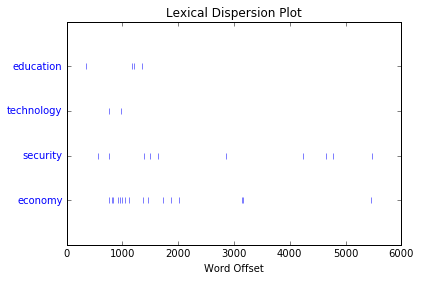

In [10]:
%matplotlib inline

text_transcript.dispersion_plot(["education", "technology", "security", "economy"])

### Stopword Removal
We may also want to remove stopwords, words that are often considered to be so frequent that they don't contain much information. In general you should carefully consider what words are included in your stoplist, but of course there is a default list of terms built into NLTK. To get that list we first have to initiate the download of the NLTK resources (the next cell should initiate a dialog box where you need to click the "download" button).

In [11]:
nltk.download()

showing info http://nltk.github.com/nltk_data/


True

In [12]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
print stopword_list 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

To remove the words in the stopword list we can use a [python list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions).

In [13]:
transcript_tokens = [w for w in transcript_tokens if w not in stopword_list]
print transcript_tokens

[u'mr', u'speaker', u'mr', u'vice', u'president', u'members', u'congress', u'fellow', u'americans', u'tonight', u'marks', u'eighth', u'year', u"i've", u'come', u'report', u'state', u'union', u'final', u'one', u"i'm", u'going', u'try', u'make', u'little', u'shorter', u'applause', u'know', u'antsy', u'get', u'back', u'iowa', u'laughter', u"i've", u"i'll", u'shaking', u'hands', u'afterwards', u'want', u'tips', u'laughter', u'understand', u"it's", u'election', u'season', u'expectations', u'achieve', u'year', u'low', u'mr', u'speaker', u'appreciate', u'constructive', u'approach', u'leaders', u'took', u'end', u'last', u'year', u'pass', u'budget', u'make', u'tax', u'cuts', u'permanent', u'working', u'families', u'hope', u'work', u'together', u'year', u'bipartisan', u'priorities', u'like', u'criminal', u'justice', u'reform', u'applause', u'helping', u'people', u'battling', u'prescription', u'drug', u'abuse', u'heroin', u'abuse', u'applause', u'knows', u'might', u'surprise', u'cynics', u'tonigh

In [14]:
len(transcript_tokens)

3290

### Frequencies

And finally we're ready to count up the frequency of tokens in the text. Below we print just the top 25 most frequent terms. 

In [17]:
from nltk.probability import FreqDist

# Construct the distribution (it will count the number of occurrances of each unique token)
frequency_distribution = FreqDist(transcript_tokens)
frequency_distribution.items()[:25]

[(u'applause', 89),
 (u"that's", 35),
 (u'us', 34),
 (u"it's", 32),
 (u'america', 28),
 (u'people', 27),
 (u'world', 24),
 (u'american', 22),
 (u'work', 22),
 (u'make', 19),
 (u'new', 19),
 (u'want', 19),
 (u'change', 18),
 (u'even', 18),
 (u'years', 18),
 (u'year', 17),
 (u'economy', 16),
 (u"we've", 16),
 (u'americans', 15),
 (u'better', 15),
 (u'every', 15),
 (u'need', 15),
 (u'see', 15),
 (u"don't", 14),
 (u'like', 13)]

We can see that a very common terms is "applause", because the text included a transcription of when the audience applauded during the speech. We might want to remove that term.

In [18]:
del frequency_distribution["applause"]
frequency_distribution.items()[:25]

[(u'applause', 89),
 (u"that's", 35),
 (u'us', 34),
 (u"it's", 32),
 (u'america', 28),
 (u'people', 27),
 (u'world', 24),
 (u'american', 22),
 (u'work', 22),
 (u'make', 19),
 (u'new', 19),
 (u'want', 19),
 (u'change', 18),
 (u'even', 18),
 (u'years', 18),
 (u'year', 17),
 (u'economy', 16),
 (u"we've", 16),
 (u'americans', 15),
 (u'better', 15),
 (u'every', 15),
 (u'need', 15),
 (u'see', 15),
 (u"don't", 14),
 (u'like', 13)]

Can you start to see some of the themes of the speech based on the frequency of different words chosen? It looks like "work" and the "economy" came up fairly often. Maybe we want to screen the tokens for other economic types terms.

In [19]:
econ_terms = ["debt", "economy", "budget", "spending", "tax", "deficit", "work", "working", "workers", "workforce", "companies", "worked", "economics", "businesses", "jobs"]

econ_transcript_tokens = [t for t in transcript_tokens if t in econ_terms]
econ_transcript_freq_dist = FreqDist(econ_transcript_tokens)
econ_transcript_freq_dist

<FreqDist with 10 samples and 71 outcomes>

Individual tokens or unigrams as they're sometimes called aren't the only thing we can tally. We can also look at pairs of words (bigrams), or more generally, n-grams.

In [20]:
bigrams = nltk.bigrams(transcript_tokens)
bigram_freq_dist = FreqDist(bigrams)
bigram_freq_dist.items()[:25]

[((u'american', u'people'), 9),
 ((u'applause', u"that's"), 8),
 ((u'new', u'economy'), 5),
 ((u'seven', u'years'), 5),
 ((u'al', u'qaeda'), 4),
 ((u'applause', u"it's"), 4),
 ((u'climate', u'change'), 4),
 ((u'right', u'thing'), 4),
 ((u'states', u'america'), 4),
 ((u'united', u'states'), 4),
 ((u"we've", u'got'), 4),
 ((u'work', u'together'), 4),
 ((u'american', u'leadership'), 3),
 ((u'applause', u'let'), 3),
 ((u'applause', u'need'), 3),
 ((u'applause', u"we've"), 3),
 ((u'better', u'politics'), 3),
 ((u'even', u'close'), 3),
 ((u'every', u'american'), 3),
 ((u'fellow', u'americans'), 3),
 ((u'health', u'care'), 3),
 ((u"i'm", u'going'), 3),
 ((u"it's", u'even'), 3),
 ((u"it's", u'right'), 3),
 ((u'last', u'year'), 3)]

### Stemming
The chart above shows that there are are a number of versions of the same basic idea, e.g. "workers", "working", and "worked" that all have the same underlying concept behind them. 

Stemming is a technique that is used remove affixes from a word. There are different stemming algorithms that can be employed, and several are built in to NLTK. We'll use the Porter algorithm. The advantage of stemming is that it allows for additional aggregation of words that represent a similar concept. At the same time, there is a loss of information due to this aggregation, and as you can see below, the stems that are left after the stemming process aren't always easy to read.

In [ ]:
porter = nltk.PorterStemmer()
econ_transcript_tokens_stemmed = [porter.stem(t) for t in econ_transcript_tokens]
econ_transcript_tokens_stemmed

In [ ]:
import pandas as pd 
econ_transcript_stemmed_freq_dist = FreqDist(econ_transcript_tokens_stemmed)
econ_transcript_stemmed_freq_dist
# Create a simple list
econ_data = []
for item in econ_transcript_stemmed_freq_dist:
    econ_data.append([item, econ_transcript_stemmed_freq_dist[item]])

# Use the list to intitlize a pandas dataframe
econ_df = pd.DataFrame(econ_data, columns=["token", "count"])
econ_df = econ_df.sort_values("count")
econ_df

## Sentiment Analysis
Sentiment analysis is a general term used to describe how text can be analyzed to infer subjective qualities like positivity, negativity, or other types of emotions like happiness, sadness, or anger. There are many pitfalls to be aware of when you're trying to make something as subjective as human emotion in a quantifiable number. Simple approaches often do not account for even basic linguistic structures like negations (e.g. "I'm *not* sad today"). Take these results with a grain of salt, but also be aware that there often is *some* signal in all of the ambiguous noise of text.

We'll look at sentiment analysis by examining a corpus of reviews written on Yelp. Yelp has an [academic dataset](https://www.yelp.com/academic_dataset) that it makes available. It includes information on individual reviews, users, and businesses. From that large dataset we've sampled down to only the reviews that respond to businesses in the state of Maryland, which is a reasonable number. Here is the [yelp_reviews_md.csv](https://www.dropbox.com/s/oc8dx9qp6xk4245/yelp_reviews_md.csv?dl=0) file. 

In [ ]:
reviews_df = pd.read_csv("Data/yelp_reviews_md.csv", encoding="utf-8")
reviews_df

In [ ]:
reviews_df.shape

A simple method to pursue sentiment analysis is using various linguistic resources like dictionaries of terms that have been constructed to correspond to various categories of human communication. One of most popular linguistic resources for doing this is Linguistic Inquiry and Word Count ([LIWC](http://liwc.wpengine.com/)). From that project there are lists of terms that related to sentiment categories like "Positive Emotion", "Negative Emotion", and "Anger" and well as more general types of categories like "Seeing", "Insight", "Health/illness" etc. Another useful project with many linguistic resources is the [General Inquirer](http://www.wjh.harvard.edu/~inquirer/).

Here we've isolated the term lists from LIWC corresponding to [positive](https://www.dropbox.com/s/bo82rjzhcd4jy6g/positive_terms.txt?dl=0) and [negative](https://www.dropbox.com/s/9ecamxu1jbtwd6n/negative_terms.txt?dl=0) terms in two separate files (linked previously in this sentence). Note that these term lists have been *stemmed* which means we will also need to stem our input text in order to match it against these dictionaries.

In [ ]:
positive_terms = []
f = open('Data/positive_terms.txt', "r")
positive_terms = f.read().splitlines()
f.close()

negative_terms = []
f = open('Data/negative_terms.txt', "r")
negative_terms = f.read().splitlines()
f.close()

In [ ]:
print positive_terms
print ""
print negative_terms

The hypothesis that we're going to test with sentiment analysis is that reviews with a higher overall star rating should have less negative sentiment than reviews with a lower overall star rating. And conversely, reviews with a higher overall star rating should have more positive sentiment than reviews with a lower overall star rating.

First we need to measure a positivity and negativity score for each review. To do that we're going to count the rate of use of terms from a review that come from the positive or negative dictionaries, respectively.

In [ ]:
# This function will take a string and lowercase it, remove punctuations and spaces, and then tokentize and stem those tokens
def normalize_review_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = " ".join(text.split())
    text_tokens = tokenizer.tokenize(text)
    text_tokens = [porter.stem(w) for w in text_tokens if w not in stopword_list]
    return text_tokens

# Apply the function above to the text column
reviews_df["text"] = reviews_df["text"].apply(normalize_review_text)
reviews_df

In [ ]:
def calculate_positivity(text):
    num_tokens = len(text)
    num_positive_tokens = 0
    for t in text:
        if t in positive_terms:
            num_positive_tokens = num_positive_tokens + 1
    # The positivity score is the fraction of tokens that were found in the positive dictionary
    return float(num_positive_tokens) / float(num_tokens)

reviews_df["positivity_score"] = reviews_df["text"].apply(calculate_positivity)

def calculate_negativity(text):
    num_tokens = len(text)
    num_negative_tokens = 0
    for t in text:
        if t in negative_terms:
            num_negative_tokens = num_negative_tokens + 1
    # The positivity score is the fraction of tokens that were found in the positive dictionary
    return float(num_negative_tokens) / float(num_tokens)

reviews_df["negativity_score"] = reviews_df["text"].apply(calculate_negativity)
reviews_df

Based on our hypothesis we should see a positive correlation between `positivity_score` and `stars` and a negative correlation between `negativity_score` and `stars`. Let's see:

In [ ]:
import scipy.stats as sp

pos_score_stars_corr = sp.pearsonr(reviews_df["stars"].values, reviews_df["positivity_score"].values)
pos_score_stars_corr
print "Between the positivity score and the star rating there is a correlation coefficient of %.4f which has a p-value of %.4E " % (pos_score_stars_corr[0], pos_score_stars_corr[1])

print ""

neg_score_stars_corr = sp.pearsonr(reviews_df["stars"].values, reviews_df["negativity_score"].values)
neg_score_stars_corr
print "Between the negativity score and the star rating there is a correlation coefficient of %.4f which has a p-value of %.4E " % (neg_score_stars_corr[0], neg_score_stars_corr[1])

Based on our (albeit very simple) sentiment analysis we've shown that the sentiments we've computed relate to the actual star ratings of reviews quite well - more positive reviews have higher star ratings, more negative reviews have lower star ratings.  

How could we use this in an investigation? 